# Discrete Fourier Transforms

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Windowing

1. Trapezoidal Window function $trapWindow(x)$ that rises in the first 10% and falls in the final 10% of the points.  It should be at its maximum value for all points in between.

2. $sineWindow(x)$ that uses the first lobe of a sine wave (from 0 to $\pi$).

Both of these window functions should accomodate an input data set with an arbitrary, even number of points.  

Plot the functions for 50 points within the range of $-1 \leq x \leq 1$.


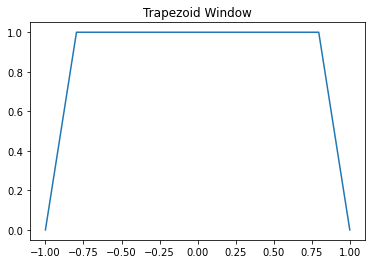

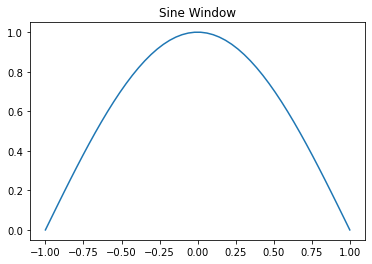

In [2]:
# data set
x = np.linspace(-1, 1, 50)

# function creating the trapazoid window which takes in x points
def trapWindow(x):
    n = x.size # number of x
    tr = np.zeros(n) # trapizoid 
    # formating first and last 10%
    A = n//10
    B = n-A
    for i in range(1, n-1):
        if i <= A: # if it is in first 10 percent
            tr[i] = i/A
        elif i >= B: # if it is the last 10 percent
            tr[i] = 1 + (B-(i+1))/A        
        else: # otherwise it is 1
            tr[i] = 1
    return tr

# return sign function with correct period and shift
def sineWindow(x):
    return np.sin(np.pi*(x+1)/2)

plt.plot(x, trapWindow(x))
plt.title("Trapezoid Window")
plt.show()
plt.plot(x, sineWindow(x))
plt.title("Sine Window")
plt.show()

# $myDFT(t, y)$ & $plotFourier(t, ak, bk, omega)$

Calculates  the $a_k$ and $b_k$ coefficients using the forms for DFTs.  
Returns the evaluated Fourier expansion and plots the Fourier series expansion using the Fourier coefficients as input using 201 points.

Sawtooth function:
- Data set of the linear funcion $f(t) = 2t$ with 30 regularly spaced points between  $-\pi \leq t \leq \pi$
- First and last points are 0

In [3]:
# initial data set
t = np.linspace(-np.pi, np.pi, 30) 

# function
def fx(t):
    return 2*t

# calculate and print coefficicents
def myDTF(t, y):
    
    T = t[-1] - t[0] #period
    omega = 2*np.pi/T # calculate omega
    
    kmax = len(y)//2 + 1 # plus one because N (30) is even
    t[0] = t[-1] = 0 # manually set first and last term to zero
    
    ak = np.zeros(kmax)
    bk = np.zeros(kmax)
    
    for k in range(0,kmax):
        ak[k] = np.sum(y*np.cos(k*omega*t))/kmax # set ak
        bk[k] = np.inner(y/kmax, np.sin(k*omega*t)) # set bk
        
    print("Coefficients: \nak:\n", ak, "\nbk:\n", bk) # print
    return omega, ak, bk

def plotFourier(t, ak, bk, omega):
    
    fourier = np.ones(t.size) * ak[0]/2 # skiping first value
    
    for k in range(1, ak.size): # start at 1 and go to number that is the size of ak
            
        fourier += ak[k]*np.cos(k*omega*t) + bk[k]*np.sin(k*omega*t)
    
    plot = plt.plot(t, fourier) # plot
    
    return

Coefficients: 
ak:
 [ 7.77156117e-16 -6.10622664e-16  7.77156117e-16 -3.33066907e-16
 -5.55111512e-16  5.55111512e-16 -1.22124533e-15  1.88737914e-15
 -1.05471187e-15  7.77156117e-16  1.11022302e-15 -1.99840144e-15
  2.66453526e-15 -2.49800181e-15  1.77635684e-15  1.05471187e-15] 
bk:
 [ 0.          3.61080843 -1.78404991  1.16548934 -0.84880515  0.65267095
 -0.51658681  0.41456738 -0.33356161  0.26625658 -0.20819588  0.15646561
 -0.10903236  0.06437975 -0.02129153 -0.02129153]


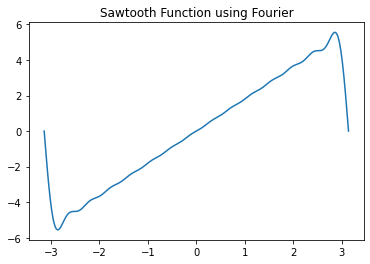

In [4]:
f = fx(t)
omega, ak, bk = myDTF(t, f)
tF = np.linspace(-np.pi, np.pi, 201)
plotFourier(tF, ak, bk, omega)
plt.title("Sawtooth Function using Fourier")
plt.show()

# Window Function Preformance

Use the two windowing functions separately on the sawtooth function to compare performance.

The Trapzoid function is singificantly better than the sine function

In [5]:
t = np.linspace(-np.pi, np.pi, 30) 

Coefficients: 
ak:
 [ 4.02455846e-16 -6.52256027e-16  8.88178420e-16 -2.91433544e-16
 -4.85722573e-16  4.44089210e-16 -1.35308431e-15  1.95503336e-15
 -1.00613962e-15  7.63278329e-16  1.05471187e-15 -2.02615702e-15
  2.70616862e-15 -2.41473508e-15  1.77635684e-15  1.11022302e-15] 
bk:
 [ 0.          3.4112484  -1.40734711  0.6530111  -0.25454389  0.03516857
  0.06948765 -0.09660748  0.07544211 -0.03140261 -0.01436694  0.04657816
 -0.05710484  0.04530516 -0.01710124 -0.01710124]


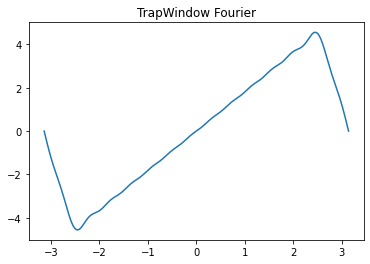

In [6]:
yT = fx(t) * trapWindow(t)
omegaT, akT, bkT = myDTF(t, yT)
plotFourier(tF, akT, bkT, omegaT)
plt.title("TrapWindow Fourier")
plt.show()

In [7]:
t = np.linspace(-np.pi, np.pi, 30) 

Coefficients: 
ak:
 [ 5.55111512e-17 -2.22044605e-16  6.10622664e-16 -1.38777878e-17
  0.00000000e+00  1.66533454e-16 -5.96744876e-16  9.02056208e-16
 -7.49400542e-16  5.41233725e-16  8.32667268e-16 -7.07767178e-16
  1.94289029e-15 -1.55431223e-15  9.71445147e-16 -2.77555756e-17] 
bk:
 [ 0.          2.19005788 -1.97334256 -0.10925007  0.14651552 -0.12674157
  0.10499097 -0.08619722  0.07026582 -0.056545    0.04444913 -0.03352235
  0.02341354 -0.01384411  0.00458151  0.00458151]


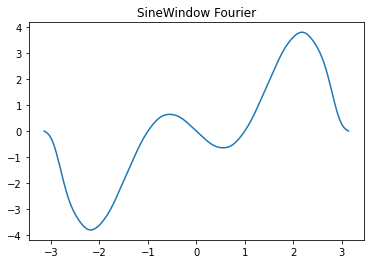

In [8]:
yS = -fx(t) * sineWindow(t)
omegaS, akS, bkS = myDTF(t, yS)
plotFourier(tF, akS, bkS, omegaS)
plt.title("SineWindow Fourier")
plt.show()

# $cDFT(t, y)$
Calculates the $c_k$ coefficients using the complex form for discrete Fourier transforms. 

Absolute value of the coefficients vs the "frequencies" $k \omega$ of the Fourier transform.

Coefficients: 
 ck:
 [ 1.11022302e-15-0.02271096j  1.83186799e-15-0.02271096j
 -2.66453526e-15+0.06867173j  3.05311332e-15-0.11630119j
 -2.10942375e-15+0.16689666j  1.22124533e-15-0.2220756j
  8.88178420e-16+0.28400702j -1.16573418e-15-0.35579905j
  1.94289029e-15+0.44220521j -1.38777878e-15-0.55102593j
  2.77555756e-16+0.69618235j -4.99600361e-16-0.90539217j
 -3.88578059e-16+1.24318863j  1.05471187e-15-1.90298658j
 -3.88578059e-16+3.85152899j  8.32667268e-16+0.j
 -3.88578059e-16-3.85152899j  1.05471187e-15+1.90298658j
 -3.88578059e-16-1.24318863j -4.99600361e-16+0.90539217j
  2.77555756e-16-0.69618235j -1.38777878e-15+0.55102593j
  1.94289029e-15-0.44220521j -1.16573418e-15+0.35579905j
  8.88178420e-16-0.28400702j  1.22124533e-15+0.2220756j
 -2.10942375e-15-0.16689666j  3.05311332e-15+0.11630119j
 -2.66453526e-15-0.06867173j  1.83186799e-15+0.02271096j]


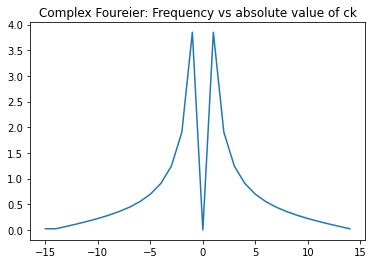

In [9]:
def cDFT(t, y):
    N = len(y) # length
    T = t[-1] - t[0] # period
    omega = 2 * np.pi/T #omega
    kmax = N//2 # max range
    j = 1j # complex number for aesthetic
    ck = np.zeros(N, dtype = 'complex') # complex array
    
    # using nested for loop to calculate coefficients
    for a in range(N):
        for b in range(N): # (y/kmax) * e^(-iwt*K)
            ck[a] += y[b]*np.exp(-omega*(a-kmax)*j*t[b])/kmax
            
    print("Coefficients: \n ck:\n", ck)
    return omega, ck

# new t points
t = np.linspace(-np.pi, np.pi, 30)
omegaC, ck = cDFT(t, fx(t))

NCK = len(ck)
# create array and calcalte frequency (f=kw)
frequency = np.zeros(NCK) 
for k in range(NCK):
    frequency[k] = omegaC * k  

# plot absolute value of coefficients vs frequency
plt.plot(frequency-15, abs(ck)) # ammended to freq-15 to to centre at zero showing "negative frequencies"
plt.title("Complex Foureier: Frequency vs absolute value of ck")
plt.show()